# Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading the Data & Basic Structure

In [3]:
raw_analyst_ratings = pd.read_csv("../data/raw_analyst_ratings.csv")
print(raw_analyst_ratings.shape)

(1407328, 6)


In [4]:
print("The first 5 rows")
raw_analyst_ratings.head()

The first 5 rows


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
print("The last 5 rows")
raw_analyst_ratings.tail()

The last 5 rows


,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [6]:
print("Random 5 rows")
raw_analyst_ratings.sample(5)

Random 5 rows


,Unnamed: 0,headline,url,publisher,date,stock
62410,63056,Deutsche Bank Reiterates Hold Rating on Allsta...,https://www.benzinga.com/analyst-ratings/analy...,Michael J. Zerinskas,2010-07-01 00:00:00,ALL
14725,15222,A Peek Into The Markets: U.S. Stock Futures Do...,https://www.benzinga.com/news/earnings/17/04/9...,Lisa Levin,2017-04-04 00:00:00,ACHC
468286,470823,'Fast Money Halftime Report' Traders Give Thei...,https://www.benzinga.com/media/19/11/14761961/...,Craig Jones,2019-11-07 00:00:00,EXPE
650755,654037,"Stocks Which Set New 52-Week High Yesterday, J...",https://www.benzinga.com/trading-ideas/technic...,Benzinga Newsdesk,2018-07-25 00:00:00,IDXX
573967,577006,GAP Option Alert: Fri $28 Puts Sweep (8) at th...,https://www.benzinga.com/news/earnings/17/11/1...,Charles Gross,2017-11-16 00:00:00,GPS


In [7]:
print("The Shape of the dataset")
raw_analyst_ratings.info()

The Shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [8]:
print("Check for missing values:")
print(raw_analyst_ratings.isna().sum())

Check for missing values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [9]:
print("Categorical Column Summary:")
print(raw_analyst_ratings.describe(include=['object']))

Categorical Column Summary:
                       headline  \
count                   1407328   
unique                   845770   
top     Benzinga's Top Upgrades   
freq                       5449   

                                                      url      publisher  \
count                                             1407328        1407328   
unique                                             883429           1034   
top     https://www.benzinga.com/news/20/03/15538835/s...  Paul Quintaro   
freq                                                 1704         228373   

                       date    stock  
count               1407328  1407328  
unique                39957     6204  
top     2020-03-12 00:00:00      MRK  
freq                   1766     3333  


In [10]:
print("Numeric Column Summary:")
print(raw_analyst_ratings.describe())

Numeric Column Summary:
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


# EDA  

## 1. Descriptive Statistics 

### A. Headline Length

In [11]:
raw_analyst_ratings['headline_length'] = raw_analyst_ratings['headline'].astype(str).apply(len)

print("Headline Length Summary:")
print(raw_analyst_ratings['headline_length'].describe())

Headline Length Summary:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


### B. Publisher Count

In [12]:
publisher_counts = raw_analyst_ratings['publisher'].value_counts()

print("Top 10 Publishers by Article Count:")
top10 = publisher_counts.head(10)
top10

Top 10 Publishers by Article Count:


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64

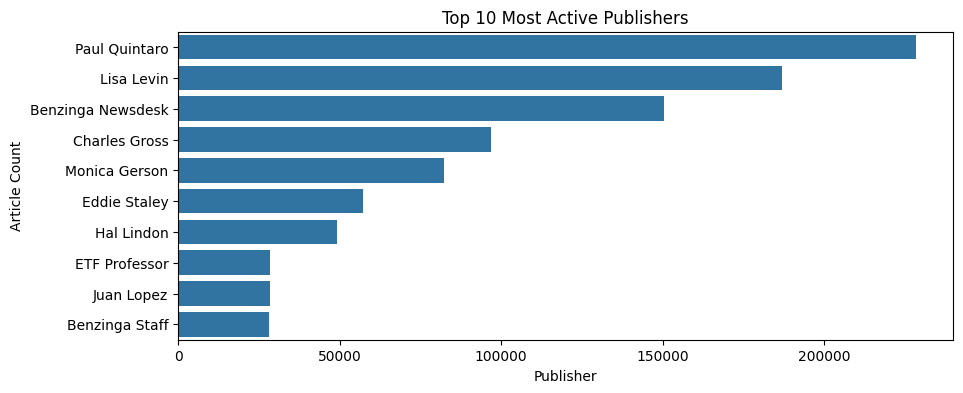

In [13]:
plt.figure(figsize=(10,4))
sns.barplot(x=top10.values, y=top10.index)
plt.title("Top 10 Most Active Publishers")
plt.ylabel("Article Count")
plt.xlabel("Publisher")
plt.show()

### C. Publication Date

In [14]:
raw_analyst_ratings['date'] = pd.to_datetime(raw_analyst_ratings['date'], errors='coerce')

print("Missing Dates After Conversion:")
print(raw_analyst_ratings['date'].isna().sum())

Missing Dates After Conversion:
1351341


## 2. Text Analysis

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(t):
    t = t.lower()
    t = re.sub(r'[^a-z\s]', '', t)
    return t

raw_analyst_ratings["clean_headline"] = raw_analyst_ratings["headline"].astype(str).apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yamis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Keyword Frequency

In [16]:
all_words = " ".join(raw_analyst_ratings["clean_headline"]).split()
filtered_words = [w for w in all_words if w not in stop_words]

word_counts = pd.Series(filtered_words).value_counts().head(20)

word_counts

vs            162147
stocks        161868
q             157878
est           140606
eps           128929
shares        114209
reports       108707
update         91680
market         90880
earnings       87185
sales          79526
top            78678
pt             73054
week           67669
announces      66529
price          64232
buy            64060
downgrades     61942
trading        61158
benzingas      57985
Name: count, dtype: int64

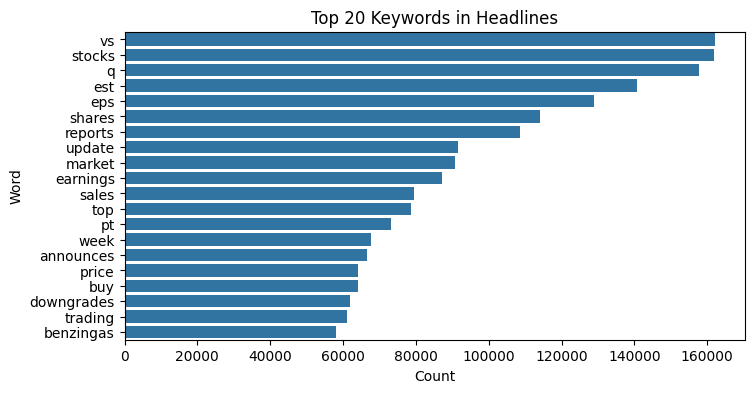

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(x=word_counts.values, y=word_counts.index)
plt.title("Top 20 Keywords in Headlines")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


### 2. Common Phrases

In [18]:
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X2 = vectorizer.fit_transform(raw_analyst_ratings["clean_headline"])
phrases = pd.Series(np.array(X2.sum(axis=0)).flatten(), index=vectorizer.get_feature_names_out())
phrases.sort_values(ascending=False).head(20)


vs est                129339
eps vs                 70250
reports eps            51208
price target           47266
stocks moving          40072
market update          33089
earnings scheduled     32055
initiates coverage     28980
raises pt              27242
companies trading      23170
trading higher         22939
adj eps                21708
premarket session      21670
sales vs               21629
benzingas upgrades     21115
trading lower          20096
stocks hit             20031
hit week               19971
new week               19288
option alert           18226
dtype: int64

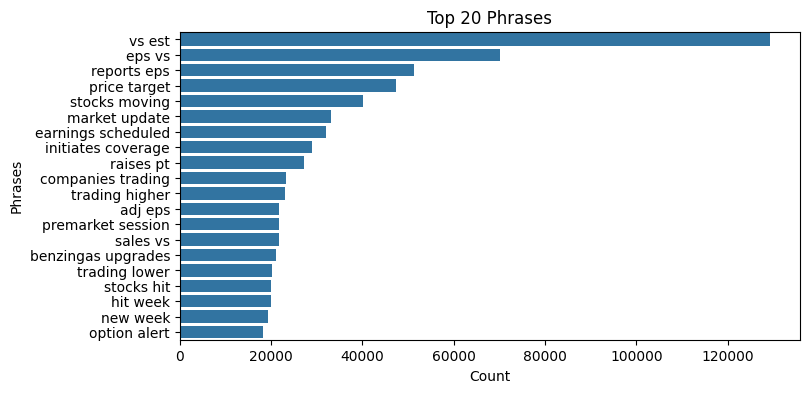

In [19]:
top_phrases = phrases.sort_values(ascending=False).head(20)

plt.figure(figsize=(8,4))
sns.barplot(x=top_phrases.values, y=top_phrases.index)
plt.title("Top 20 Phrases")
plt.xlabel("Count")
plt.ylabel("Phrases")
plt.show()


## 3. Time Series Analysis

### B. Extract Useful Time Features

In [21]:
raw_analyst_ratings["year"] = raw_analyst_ratings["date"].dt.year
raw_analyst_ratings["month"] = raw_analyst_ratings["date"].dt.month
raw_analyst_ratings["day"] = raw_analyst_ratings["date"].dt.day
raw_analyst_ratings["weekday"] = raw_analyst_ratings["date"].dt.day_name()
raw_analyst_ratings["hour"] = raw_analyst_ratings["date"].dt.hour


### C. Frequecny per Day

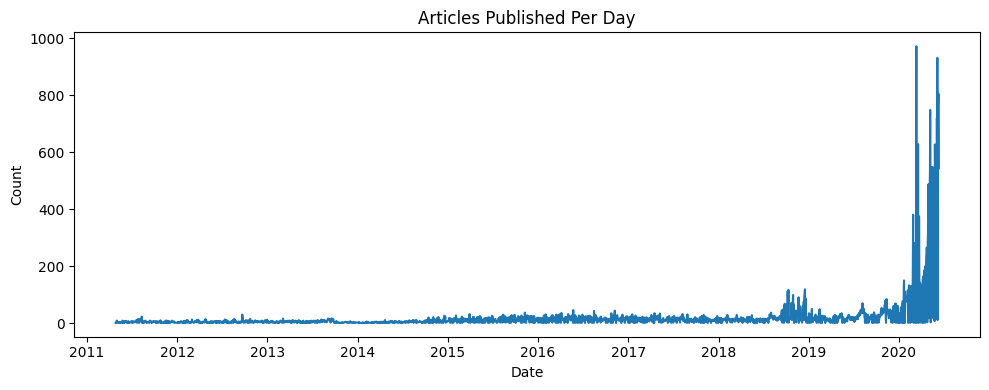

In [22]:
daily_counts = raw_analyst_ratings.groupby(raw_analyst_ratings["date"].dt.date).size()

plt.figure(figsize=(10,4))
plt.plot(daily_counts.index, daily_counts.values)
plt.title("Articles Published Per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### D. Frequency per Month

C:\Users\yamis\AppData\Local\Temp\ipykernel_23916\1520817943.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = raw_analyst_ratings.groupby([raw_analyst_ratings["date"].dt.to_period("M")]).size()


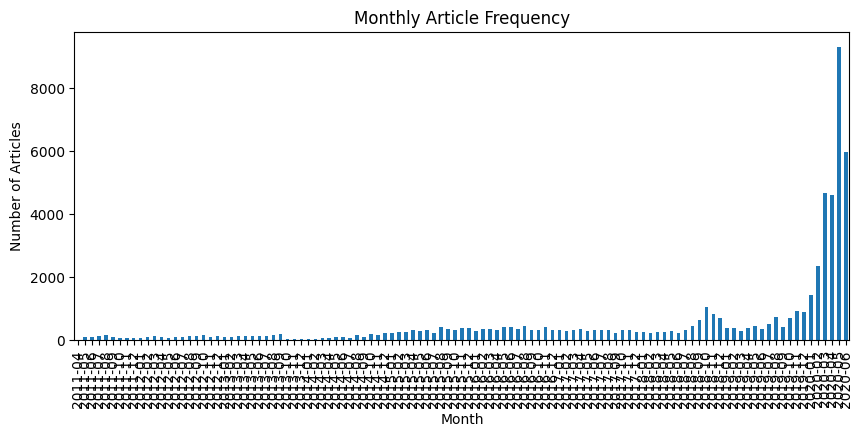

In [23]:
monthly_counts = raw_analyst_ratings.groupby([raw_analyst_ratings["date"].dt.to_period("M")]).size()

plt.figure(figsize=(10,4))
monthly_counts.plot(kind="bar")
plt.title("Monthly Article Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.show()


### E. Frequency by Day of the Week

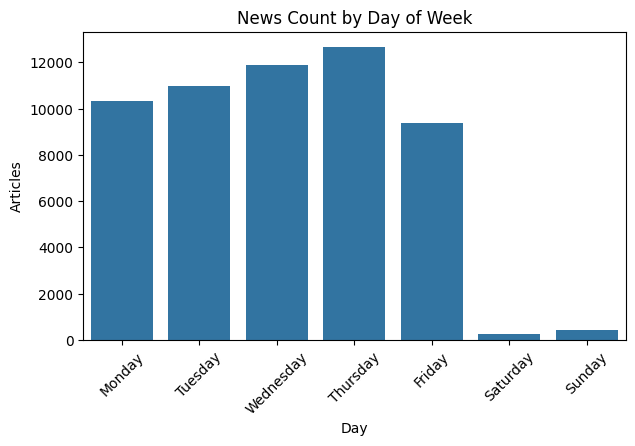

In [24]:
plt.figure(figsize=(7,4))
sns.countplot(data=raw_analyst_ratings, x="weekday", order=[
    "Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"
])
plt.title("News Count by Day of Week")
plt.xlabel("Day")
plt.ylabel("Articles")
plt.xticks(rotation=45)
plt.show()


### F. Publication Time of Day

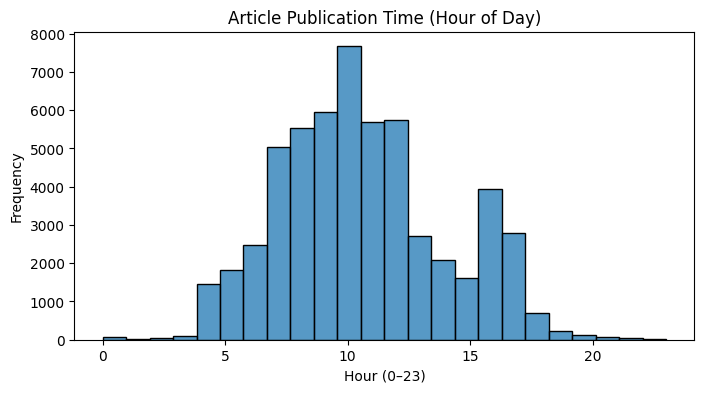

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(raw_analyst_ratings["hour"], bins=24, kde=False)
plt.title("Article Publication Time (Hour of Day)")
plt.xlabel("Hour (0–23)")
plt.ylabel("Frequency")
plt.show()


### G. Spikes

In [26]:
threshold = daily_counts.mean() + 2*daily_counts.std()
spikes = daily_counts[daily_counts > threshold]

spikes


date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64

## 4. Publisher Analysis 

### A. Active Publisher

In [27]:
print("Top 15 Publishers by Article Count:")
top15 = publisher_counts.head(15)
top15

Top 15 Publishers by Article Count:


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Name: count, dtype: int64

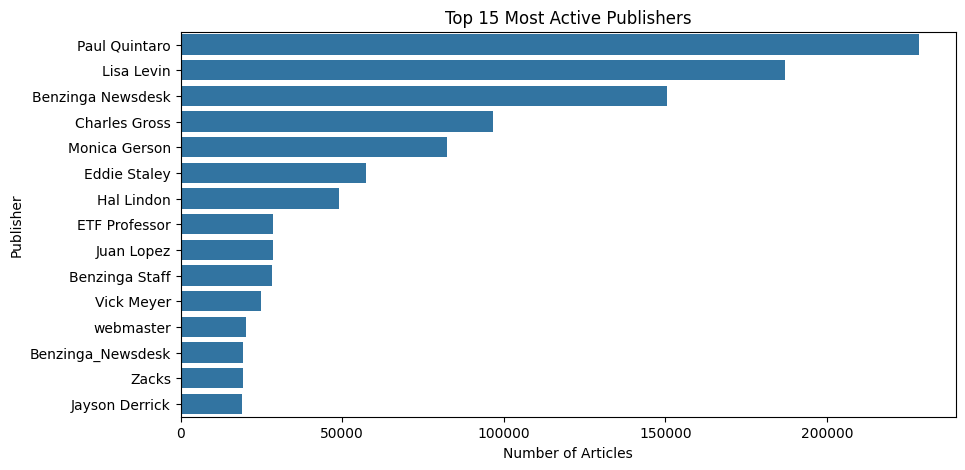

In [28]:
plt.figure(figsize=(10,5))
sns.barplot(x=top15.values, y=top15.index)
plt.title("Top 15 Most Active Publishers")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.show()


### B. Distribution of Publisher

In [29]:
print("Unique publishers:", raw_analyst_ratings["publisher"].nunique())

Unique publishers: 1034


### C. Publisher with Email  

In [30]:
raw_analyst_ratings["is_email"] = raw_analyst_ratings["publisher"].str.contains("@", na=False)
raw_analyst_ratings["is_email"].value_counts()


is_email
False    1399240
True        8088
Name: count, dtype: int64

In [31]:
# extracting domain for publisher with email
raw_analyst_ratings["domain"] = raw_analyst_ratings["publisher"].str.extract(r'@(.+)$')
domain_counts = raw_analyst_ratings["domain"].value_counts().head(10)
domain_counts


domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64

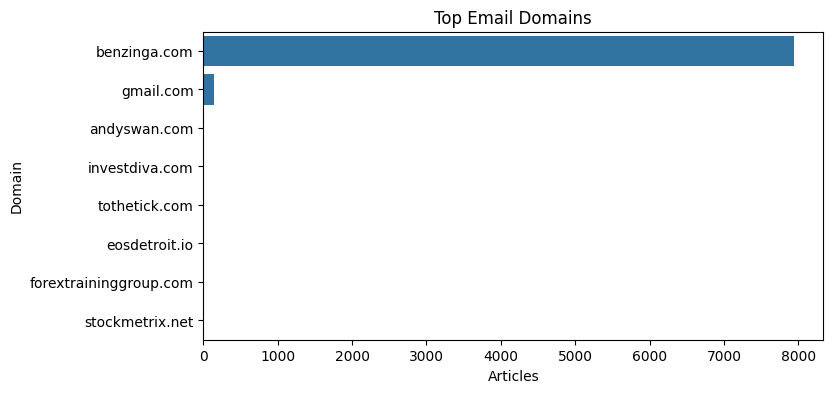

In [32]:
plt.figure(figsize=(8,4))
sns.barplot(x=domain_counts.values, y=domain_counts.index)
plt.title("Top Email Domains")
plt.xlabel("Articles")
plt.ylabel("Domain")
plt.show()
